# 4. Introduction to Statistics
I have been meaning to get to an introductory statistics post for quite some time now! Statistics play an incredibly important role in modern day machine learning. For instance, while it is a far less "sexy" description, modern day machine learning can most often be reduced to variations of **statistical learning**, where as **statistical model** can be defined as follows:

> A statistical model is a mathematical model which is modified or trained by the input of data points. Statistical models are often but not always probabilistic.

Now, most of this post will probably be familiar in some capacity, but the main goal is not to introduce new concepts. Rather, it is to make concepts that we will be using frequently more concrete.

## 1. Population vs. Sample
One of the first concepts that you must have a good understanding of when interacting with statistics and statistical learning is that of a **population** and a **sample**. Many analysis and algorithms rest upon the correct usage of these two different groups, so having a good intuition surrounding them both is paramount. 

Simply put, a population is defined as follows:

> **Population**: A population includes all of the elements that make up a specified group. 

An example of a population in the context of US voting would be all of the citizens who will be voting in the United States. If you are familiar with a **set theory**, you can think of this as the **universe**. 

A sample, can then be defined as:

> **Sample**: A subgroup of the population, which can be used to describe the entire population.

In this case, if we selected 100 voters randomly from each state (5,000 voters in total), that could constitute as our sample. Continuing our set theory analogy, we can think of this as a subset. 

### 1.1 Why Sample 
In general, the main reasons that we would sample from a population and work with that subgroup are as follows:
* Impossible to get data on the entire population
* Computationaly infeasible to run analysis on the entire population

Now, the main benefit of sampling and being able to work with that subgroup is that we can then **make inferences** about the entire population. By gathering a sample we can use techniques and metrics described in the coming sections in order to make inferences and generate opinions about the entire population. 

### 1.2 Sampling Visualization
To make this all a bit more concrete, let's say that we have the following data set: 1000 people whom we know their height and income. This can be visualized a 2-d plot below:

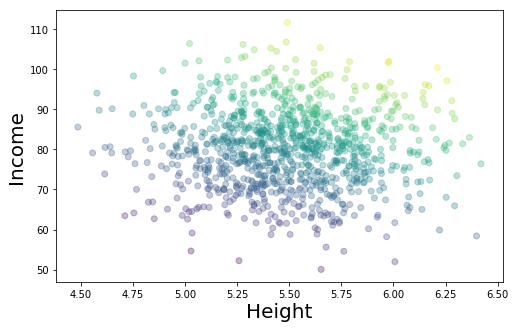

In [65]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fig, ax = plt.subplots(figsize=(8,5))

rng = np.random.RandomState(0)
x = rng.randn(1000)/3 + 5.5
y = rng.randn(1000)/0.1 + 80
# colors = rng.rand(100)
colors = x*y

plt.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')
ax.set_xlabel('Height', fontsize=20)
ax.set_ylabel('Income', fontsize=20)
plt.show()

Now, let's say that we want to sample from this population (for one of the reasons listed above). This would look like:

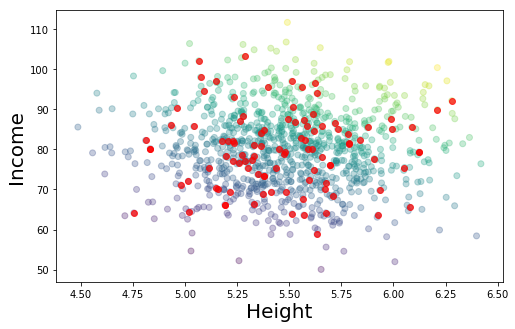

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')

sample_idxs = np.random.randint(0, 1000, size=100)
x_sample = x[sample_idxs]
y_sample = y[sample_idxs]
sample_colors = x_sample*y_sample
ax.scatter(x_sample, y_sample, c='red', alpha=0.7)

ax.set_xlabel('Height', fontsize=20)
ax.set_ylabel('Income', fontsize=20)

plt.show()

And if we no longer overlay the original population in the background, we can look at only our freshly sampled data set:

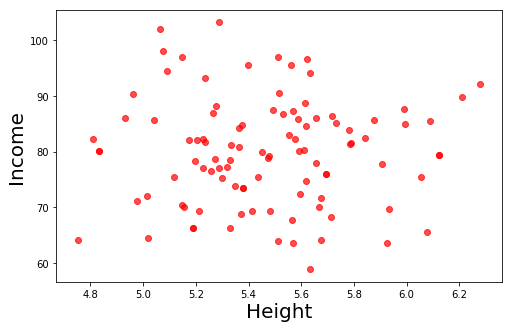

In [67]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_sample, y_sample, c='red', alpha=0.7)
ax.set_xlabel('Height', fontsize=20)
ax.set_ylabel('Income', fontsize=20)
plt.show()

Now, we will pause our discussion surrounding sampling here for now, and move on to build up our vocabulary in several other areas of statistics before coming back. Once we have a deeper understanding of a few other areas, it will strengthen the need for sampling and it's connection to the population. 

## 2. Descriptive Statistics
With a good understanding of the differences between a population and a sample, we can now move onto **descriptive statistics**. Simply put: 

> Descriptive statistics entail the numbers and calculations that we use to summarize raw data. 

This is best illustrated by an example. Imagine that we are political entity that is trying to make decisions concerning public spending. To do this, we deem it important to have a good handle on the _income of the population_ that we are overseeing. There are many different ways that we could go about doing this. Let's say that we are over seeing New York City, to make this more concrete. As of 2019 the population of NYC is listed at 8.6 million people. So, imagine for a second that we are fortunate enough to have income data on every single person (an unrealistic assumption, but one we will hold for now). If we want to understand the income of our population, we could go through each individual row, from the first all the way up the 8.6 millionth, observing the income of each individual person. 

Clearly, I don't think anyone in their right mind would find the above a realistic or well thought out approach! However, it is important to keep in mind that that is our entire goal when dealing with descriptive statistics; the data above can be thought of as _the ground truth_ and we are trying to find simpler ways of representing it so that we as humans can make sense of it. The key here is that there are _different ways_ to represent it, and depending on which we chose we can end up with very different inferences. A few common describe raw data, that nearly everyone has heard of at some point, are through the use of the **mean**, **median**, and **mode**. Each of these has its own spin on how to determine the "middle" of a distribution.

### 2.1 Mean
Let's reduce our example from the above to something a bit easier to hold in our brains. Say that our population is now a group of 100 people sitting in a bar, and we are trying to make sense of their income to determine if public spending needs to be increased. To make this example easy, assume that they all make 40,000 dollars. In this case we can calculate what is known as the **mean**, or **average**, to try and summarize all of the raw incomes:

$$\frac{1}{N} \sum_{i=1}^N x_i$$

Which in this case would just be:

$$\frac{40000 + 40000 + ... + 40000}{100} = 40000$$

In this case the mean provided a great summary of our data set! We originally were dealing with 100 numbers (individual incomes) and we reduced that to a single descriptor, the mean of all of the incomes. Now, of course this was a trivial case since all of the incomes were identical, but it would apply equally well if the incomes were with a range of ~5,000 dollars. 

Now, consider the following: imagine that Bill Gates then walks into the bar and is included in our analysis. I think we can still agree that the general population makes approximately 40,000 dollars. Intuitively, that is the summary of the population that we want to arrive at. However, how will having a billionare included in this calculation change things? Well, we can determine the new mean to be:

$$\frac{40000 + 40000 + ... + 40000 + 1,000,000,000}{101} = 10,039,600$$

And just like that we can see the potential draw back and ease of abuse of descriptive statistics! By introducing a simplification we risk misleading ourselves or others about the actual underlying data. Here, we had one **outlier**, bill gates (an outlier is an observation point that is distant from other observations), and that caused our mean income to explode. Based on this value, if you didn't have any access to the underlying data or knowledge of the population you may think that everyone in the bar makes approximately 10 million dollars. 

This brings up two important points, one related to the mean, and one related to statistics in general. As for the mean, we have just shown that it is _very sensitive to outliers_. This can be a drawback depending on the situation (and can be remedied by using the median, defined the in the next section). Concerning statistics in general, we have seen the potential errors that can occur if make incorrect assumptions (assuming no outliers are present and using the mean), or if we use incorrect statistics and process's all together.

Statistics are incredibly powerful. In today's world, with incredibly large amounts of data being generated every second, we _need_ ways to reduce that data into bits of knowledge that we was humans can comfortably work with. However, that reduction process requires great care and understanding, or else we can get into rocky water quickly. 

### 2.2 Median
Now, we just saw the short comings of the mean in the bar scenario above. There is a way to remedy this situation, however! What if we were to find the point that divides our distribution in half, so that half of the people lie on one side, and half on the other? In this case, we would order our 101 people in order of ascending income, which would look like:

|Person 1|Person 2|Person 3|...|Person 50|**Median**|Person 51|...|Person 100|Bill Gates|
|--------|--------|--------|---|---------|----------|---------|---|----------|----------|
|40,000  |40,000  |40,000  |...|40,000   |**40,000**|40,000   |...|40,000    |1,000,000,000|

Ahah! By splitting the data set down the middle (after it was sorted correctly in ascending order) we were able to determine the **median**, which in this case gives the exact description of the underlying phenomenon that we were looking for. Even with our outlier, Bill Gates, included we still summarize the room correctly. Even if Warren Buffet came in and sat down next to Bill, out median would prove resilient and not change! 

Note, that in some cases, we _want_ to determine the effect of outliers. If several more billionares entered the room, you can imagine that eventually we would _want_ to have their presence be reflected in the descriptive statistic we use to summarize the room. In this case the mean would be useful to include, if only to contrast with the median. By knowing the mean and median differ greatly we gain insight into the potential of _outliers_, or that we are just dealing with a wide **spread** (the concept of spread will be explored further in later sections).

### 2.3 Mode
Finally, we have the statistic known as the **mode**. The mode is the value in a data set that occurs most often. In other words, it is the value that is most likely to be sampled. In the bar example, the mode would be 40,000 dollars as well. 

A visual comparison of the above in the setting of a continuous distribution can be seen below.

<img src="https://drive.google.com/uc?id=1qoDe2jOG57qmVCoiKDNuf2yiHvN1g0z7" width="250">

## 3. Random Variables


### 3.1 Expected Value

### 3.2 Variance

### 3.3 Standard Deviation

### 3.4 Standard Error

## 4. Distributions

### 4.1 Gaussian

### 4.2 Confidence Intervals

## 5. Central Limit Theorem

## 6. Hypothesis Testing

### 6.1 Standard Error

### 6.2 t-test

### 6.3 p-value
